In [1]:
import optical_gating_analysis as OG
import matplotlib.pyplot as plt
import numpy as np
import j_py_sad_correlation as jps
import tifffile as tf

In [2]:
data_src = r"D:\Downloads\Archive\drift_corrected.tif"

In [3]:
# Get reference
oog = OG.BasicOpticalGating()
oog.sequence_manager.set_source(data_src)
oog.sequence_manager.skip_frames = 0
oog.run()

ref = oog.sequence_manager.reference_sequence
rpr = oog.sequence_manager.reference_period

# Run with reference
oog = OG.BasicOpticalGating()
oog.sequence_manager.set_source(data_src)
oog.sequence_manager.reference_sequence = ref
oog.sequence_manager.reference_period = rpr
oog.run()

# Get reference
oog2 = OG.BasicOpticalGating()
oog2.sequence_manager.set_source(data_src)
oog2.sequence_manager.skip_frames = 100
oog2.run()

ref = oog2.sequence_manager.reference_sequence
rpr = oog2.sequence_manager.reference_period

# Run with reference
oog2 = OG.BasicOpticalGating()
oog2.sequence_manager.set_source(data_src)
oog2.sequence_manager.reference_sequence = ref
oog2.sequence_manager.reference_period = rpr
oog2.run()

Setting source to D:\Downloads\Archive\drift_corrected.tif
Getting reference sequence
Reference period: 36.5615877990798; Reference indices: [5, 48]
Getting SADs
Getting phases
Setting source to D:\Downloads\Archive\drift_corrected.tif
Getting SADs
Getting phases
Setting source to D:\Downloads\Archive\drift_corrected.tif
Getting reference sequence
Reference period: 36.47816487010906; Reference indices: [7, 50]
Getting SADs
Getting phases
Setting source to D:\Downloads\Archive\drift_corrected.tif
Getting SADs
Getting phases


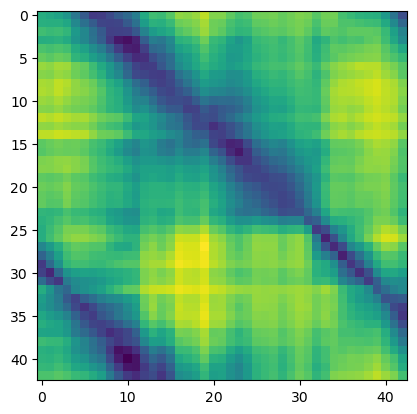

In [4]:
sads = []
for i in range(oog.sequence_manager.reference_sequence.shape[0]):
    frame = oog.sequence_manager.reference_sequence[i]
    sads.append(jps.sad_with_references(frame, oog2.sequence_manager.reference_sequence))
plt.imshow(sads)

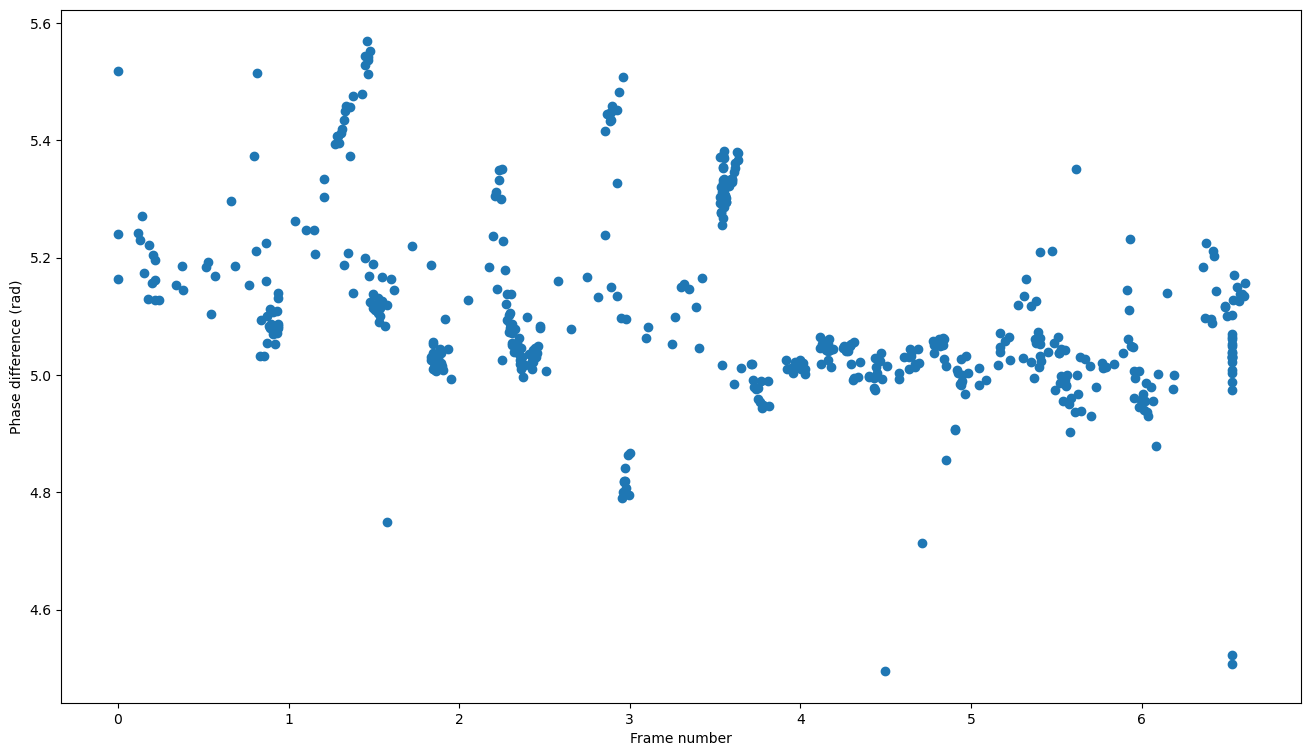

In [5]:
plt.figure(figsize = (16,9))
plt.scatter(oog.phases[0:500], oog.unwrapped_phases[0:500] - oog2.unwrapped_phases[0:500])
plt.xlabel("Frame number")
plt.ylabel("Phase difference (rad)")
plt.show()